In [17]:
import pandas as pd
from scipy.special import softmax
from scipy.stats import ttest_ind
import json
import numpy as np
import os
from scipy.stats import pearsonr, spearmanr
from matplotlib import pyplot as plt
import results
from importlib import reload
reload(results)

DATA = results.load_data()

Loading data ...
bert-base-cased_snli_std_test_c_0.4.csv
distilbert-base-uncased_snli_length_test.csv
distilbert-base-uncased_dwmw_std.csv
bert-base-cased_snli_std_test_b_0.99.csv
gpt2_snli_std3_train.csv
facebook-bart-large_cola_train_std10.csv
bert-base-cased_snli_std3_test.csv
bert-base-cased_cola_id_dev_std_0.99.csv
gpt2_cola_id_dev_std.csv
bert-base-cased_snli_std_test_a_0.05.csv
gpt2_snli_std2_train.csv
gpt2_snli_overlap_test.csv
bert-base-cased_cola_id_dev_std1.csv
facebook-bart-base_snli_length_test.csv
bert-base-cased_snli_std_test_0.05.csv
facebook-bart-large_cola_train_std3.csv
facebook-bart-base_cola_train_std.csv
bert-base-cased_cola_id_dev_std_0.8.csv
gpt2_snli_std_test.csv
bert-base-cased_snli_std_test_d_0.6.csv
bert-base-cased_dwmw_sentiment.csv
gpt2_cola_id_dev_std10.csv
facebook-bart-large_cola_id_dev_std2.csv
bert-base-cased_cola_id_dev_std_0.6.csv
bert-base-cased_snli_std_test_d_0.8.csv
bert-base-cased_snli_hypothesis_test.csv
distilbert-base-uncased_snli_hypothesis

In [2]:
print(results.VI_transform_by_class().round(3).to_latex())

\begin{tabular}{lrrr}
\toprule
{} &      0 &      1 &      2 \\
\midrule
snli\_std2\_test        &  1.188 &  1.064 &  1.309 \\
snli\_shuffled\_test    &  1.130 &  0.984 &  1.224 \\
snli\_hypothesis\_test  &  0.573 &  0.553 &  0.585 \\
snli\_premise\_test     &  0.032 & -0.016 & -0.016 \\
snli\_raw\_overlap\_test &  0.415 &  0.177 &  0.298 \\
\bottomrule
\end{tabular}



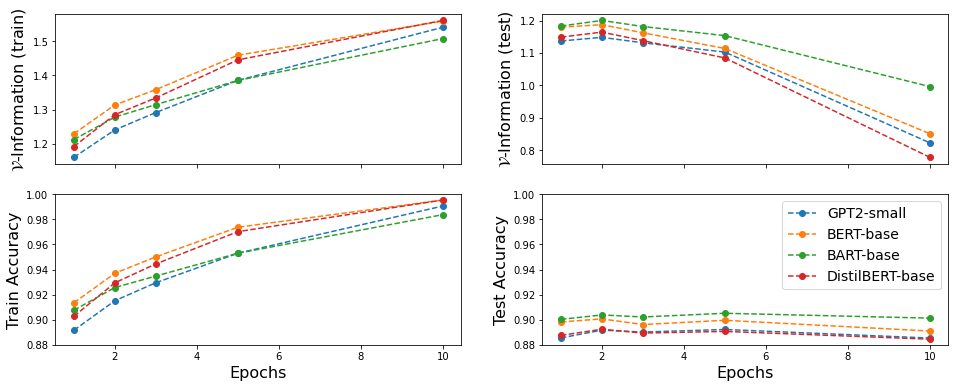

In [5]:
epochs = [ 'snli_std', 'snli_std2', 'snli_std3', 'snli_std5', 'snli_std10' ]
names = { 'gpt2' : 'GPT2-small', 'bert-base-cased' : 'BERT-base', 'facebook-bart-base' : 'BART-base', 'distilbert-base-uncased' : 'DistilBERT-base' }
x = [ 1, 2, 3, 5, 10 ]
VI_train, VI_test = {}, {}
acc_train, acc_test = {}, {}

f, ((ax2, ax1), (ax4, ax3)) = plt.subplots(2, 2, sharex='col')

for model in names:
    VI_test[model] = [ DATA[model][f'{e}_test']['PVI'].mean() for e in epochs ]
    VI_train[model] = [ DATA[model][f'{e}_train']['PVI'].mean() for e in epochs ]
    acc_test[model] = [ DATA[model][f'{e}_test']['correct_yx'].mean() for e in epochs ]
    acc_train[model] = [ DATA[model][f'{e}_train']['correct_yx'].mean() for e in epochs ]
    ax1.plot(x, VI_test[model], 'o--', label=names[model])
    ax2.plot(x, VI_train[model], 'o--', label=names[model])
    ax3.plot(x, acc_test[model], 'o--', label=names[model])
    ax4.plot(x, acc_train[model], 'o--', label=names[model])

# ax1.set_ylim([0.7, 1.6])
# ax2.set_ylim([0.7, 1.6])
ax3.set_ylim([0.88, 1])
ax4.set_ylim([0.88, 1])
    
ax1.set_ylabel('$\mathcal{V}$-Information (test)', fontsize=16)
ax2.set_ylabel('$\mathcal{V}$-Information (train)',fontsize=16)
ax3.set_ylabel('Test Accuracy',fontsize=16)
ax4.set_ylabel('Train Accuracy',fontsize=16)
ax3.set_xlabel('Epochs', fontsize=16)
ax4.set_xlabel('Epochs', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.subplots_adjust(top=0.7)

plt.rcParams["figure.figsize"] = (16, 8)
plt.show()

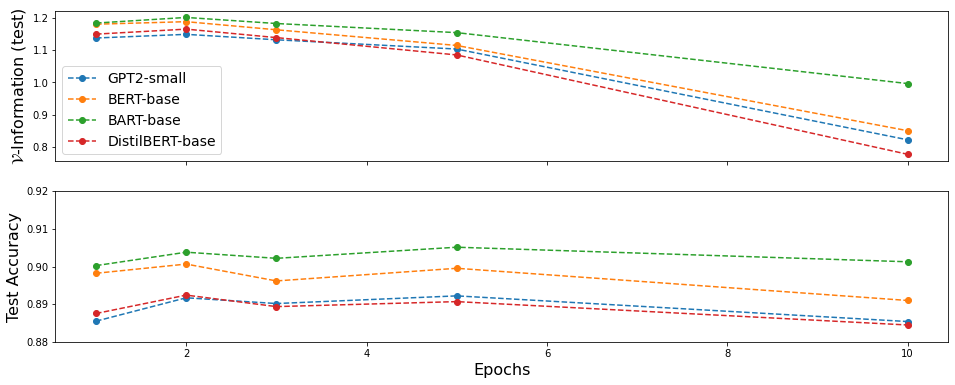

In [6]:
epochs = [ 'snli_std', 'snli_std2', 'snli_std3', 'snli_std5', 'snli_std10' ]
names = { 'gpt2' : 'GPT2-small', 'bert-base-cased' : 'BERT-base', 'facebook-bart-base' : 'BART-base', 'distilbert-base-uncased' : 'DistilBERT-base' }
x = [ 1, 2, 3, 5, 10 ]
VI_train, VI_test = {}, {}
acc_train, acc_test = {}, {}

f, (ax1, ax3) = plt.subplots(2, 1, sharex='col')

for model in names:
    VI_test[model] = [ DATA[model][f'{e}_test']['PVI'].mean() for e in epochs ]
    VI_train[model] = [ DATA[model][f'{e}_train']['PVI'].mean() for e in epochs ]
    acc_test[model] = [ DATA[model][f'{e}_test']['correct_yx'].mean() for e in epochs ]
    acc_train[model] = [ DATA[model][f'{e}_train']['correct_yx'].mean() for e in epochs ]
    ax1.plot(x, VI_test[model], 'o--', label=names[model])
    ax3.plot(x, acc_test[model], 'o--', label=names[model])

# ax1.set_ylim([0.7, 1.6])
# ax2.set_ylim([0.7, 1.6])
ax3.set_ylim([0.88, 0.92])
# ax4.set_ylim([0.88, 1])
    
ax1.set_ylabel('$\mathcal{V}$-Information (test)', fontsize=16)
# ax2.set_ylabel('$\mathcal{V}$-Information (train)',fontsize=16)
ax3.set_ylabel('Test Accuracy',fontsize=16)
# ax4.set_ylabel('Train Accuracy',fontsize=16)
ax3.set_xlabel('Epochs', fontsize=16)
# ax4.set_xlabel('Epochs', fontsize=16)
ax1.legend(loc='best', fontsize=14)
plt.subplots_adjust(top=0.7)

plt.rcParams["figure.figsize"] = (6, 8)
plt.show()

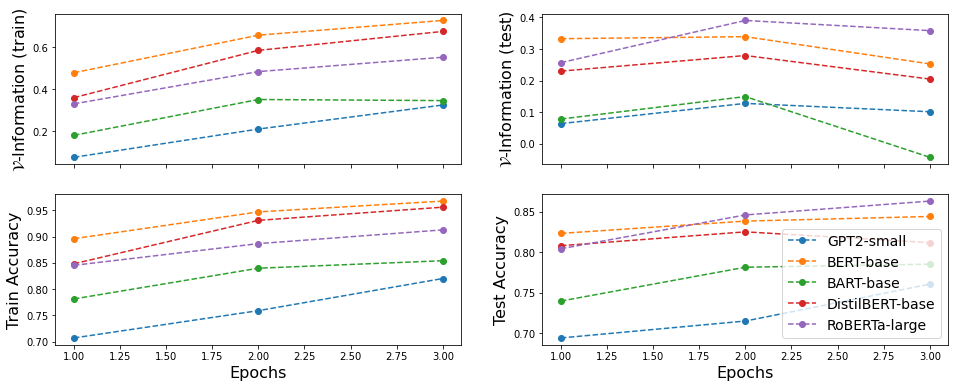

In [8]:
epochs = [ 'std1', 'std2', 'std3' ]
names = { 'gpt2' : 'GPT2-small', 'bert-base-cased' : 'BERT-base', 'facebook-bart-base' : 'BART-base', 'distilbert-base-uncased' : 'DistilBERT-base', 'roberta-large' : 'RoBERTa-large' }
x = [ 1, 2, 3 ]
VI_train, VI_test = {}, {}
acc_train, acc_test = {}, {}

f, ((ax2, ax1), (ax4, ax3)) = plt.subplots(2, 2, sharex='col')

for model in names:
    VI_test[model] = [ DATA[model][f'cola_id_dev_{e}']['PVI'].mean() for e in epochs ]
    VI_train[model] = [ DATA[model][f'cola_train_{e}']['PVI'].mean() for e in epochs ]
    acc_test[model] = [ DATA[model][f'cola_id_dev_{e}']['correct_yx'].mean() for e in epochs ]
    acc_train[model] = [ DATA[model][f'cola_train_{e}']['correct_yx'].mean() for e in epochs ]
    ax1.plot(x, VI_test[model], 'o--', label=names[model])
    ax2.plot(x, VI_train[model], 'o--', label=names[model])
    ax3.plot(x, acc_test[model], 'o--', label=names[model])
    ax4.plot(x, acc_train[model], 'o--', label=names[model])

# ax1.set_ylim([0.7, 1.6])
# ax2.set_ylim([0.7, 1.6])
# ax3.set_ylim([0.88, 1])
# ax4.set_ylim([0.88, 1])
    
ax1.set_ylabel('$\mathcal{V}$-Information (test)', fontsize=16)
ax2.set_ylabel('$\mathcal{V}$-Information (train)',fontsize=16)
ax3.set_ylabel('Test Accuracy',fontsize=16)
ax4.set_ylabel('Train Accuracy',fontsize=16)
ax3.set_xlabel('Epochs', fontsize=16)
ax4.set_xlabel('Epochs', fontsize=16)
plt.legend(loc='best', fontsize=14)
plt.subplots_adjust(top=0.7)

plt.rcParams["figure.figsize"] = (16, 8)
plt.show()

In [9]:
print(results.intra_model_corr('gpt2').round(3).to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  snli\_std\_test &  snli\_std2\_test &  snli\_std3\_test &  snli\_std5\_test &  snli\_std10\_test \\
\midrule
snli\_std\_test   &          1.000 &           0.931 &           0.887 &           0.855 &            0.747 \\
snli\_std2\_test  &          0.931 &           1.000 &           0.961 &           0.918 &            0.813 \\
snli\_std3\_test  &          0.887 &           0.961 &           1.000 &           0.933 &            0.827 \\
snli\_std5\_test  &          0.855 &           0.918 &           0.933 &           1.000 &            0.874 \\
snli\_std10\_test &          0.747 &           0.813 &           0.827 &           0.874 &            1.000 \\
\bottomrule
\end{tabular}



In [10]:
pd.set_option('display.max_colwidth', None)
print(DATA['bert-base-cased']['snli_std2_test'].sort_values('PVI', ascending=True)[['premise', 'hypothesis', 'label', 'PVI']][:10].round(3).to_latex(index=False))

\begin{tabular}{llrr}
\toprule
                                                                                                                      premise &                                                                                                       hypothesis &  label &    PVI \\
\midrule
                                                                                             Twenty five people are marching. &                                                                        A man plays the trombone on the sidewalk. &      1 & -9.966 \\
                                                                                  A woman in a striped shirt holds an infant. &                                                                                         A person is watching TV. &      1 & -9.612 \\
                                                                                        A person swimming in a swimming pool. &                                               

In [11]:
pd.set_option('display.max_colwidth', None)
print(DATA['bert-base-cased']['cola_id_dev_std2'].sort_values('PVI', ascending=True)[['sentence1', 'label', 'PVI', 'correct_yx']][:10].round(3).to_latex(index=False))

\begin{tabular}{lrrl}
\toprule
                                                                     sentence1 &  label &    PVI &  correct\_yx \\
\midrule
                                                                     Wash you! &      0 & -4.616 &       False \\
                                      Who achieved the best result was Angela. &      0 & -4.584 &       False \\
                                                      Sue gave to Bill a book. &      0 & -3.649 &       False \\
 Only Churchill remembered Churchill giving the Blood, Sweat and Tears speech. &      0 & -3.571 &       False \\
                                                               Cynthia chewed. &      0 & -3.510 &       False \\
                                                          It is a golden hair. &      1 & -3.251 &       False \\
                                                      I won't have some money. &      0 & -3.097 &       False \\
                          You may pick every fl

In [12]:
# print(results.inter_model_corr('snli_std2_test').round(3).to_latex())
# pearsonr(DATA['bert-base-cased']['cola_id_dev_std2']['PVI'], DATA['gpt2']['cola_id_dev_std2']['PVI'])

table = {}
names = ['distilbert-base-uncased', 'gpt2', 'bert-base-cased', 'facebook-bart-base']
suffix = 'cola_id_dev_std2'

for i in names:
    table[i] = { j: pearsonr(DATA[i][suffix]['PVI'], DATA[j][suffix]['PVI'])[0] for j in names }

print(pd.DataFrame.from_dict(table).round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  distilbert-base-uncased &   gpt2 &  bert-base-cased &  facebook-bart-base \\
\midrule
distilbert-base-uncased &                    1.000 &  0.466 &            0.629 &               0.521 \\
gpt2                    &                    0.466 &  1.000 &            0.322 &               0.416 \\
bert-base-cased         &                    0.629 &  0.322 &            1.000 &               0.446 \\
facebook-bart-base      &                    0.521 &  0.416 &            0.446 &               1.000 \\
\bottomrule
\end{tabular}



In [22]:
# print(list()
print(results.seed_corr('bert-base-cased').round(3).to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  snli\_std\_test\_b\_0.99 &  snli\_std\_test\_c\_0.99 &  snli\_std\_test\_d\_0.99 &  snli\_std\_test\_e\_0.99 \\
\midrule
snli\_std\_test\_b\_0.99 &                 1.000 &                 0.877 &                 0.884 &                 0.885 \\
snli\_std\_test\_c\_0.99 &                 0.877 &                 1.000 &                 0.887 &                 0.882 \\
snli\_std\_test\_d\_0.99 &                 0.884 &                 0.887 &                 1.000 &                 0.895 \\
snli\_std\_test\_e\_0.99 &                 0.885 &                 0.882 &                 0.895 &                 1.000 \\
\bottomrule
\end{tabular}



In [14]:
agreement_rates = []
names = { 'gpt2' : 'GPT2-small', 'bert-base-cased' : 'BERT-base', 'facebook-bart-base' : 'BART-base', 'distilbert-base-uncased' : 'DistilBERT-base' }

for row in open('data/snli_1.0/snli_1.0_test.jsonl'):
    row = json.loads(row)
    if row['gold_label'] in ['contradiction', 'neutral', 'entailment']:
        rate = sum(l == row['gold_label'] for l in row['annotator_labels']) / len(row['annotator_labels'])
        agreement_rates.append(rate)

for m in names:
    x = DATA[m]['snli_std2_test']
    x['agreement'] = agreement_rates

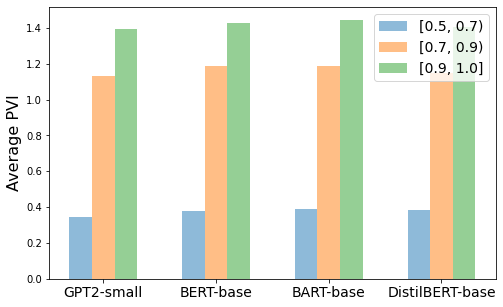

In [16]:
interval_means = {}

for i in np.arange(0.5, 1.01, 0.2):
    key = f"[{round(i, 2)}, {round(i+0.2, 2)}]"
    interval_means[key] = []
    
    for m in names:
        x = DATA[m]['snli_std2_test']
        interval_means[key].append(x[(i <= x['agreement']) & (x['agreement'] < i+0.2)]['PVI'].mean())

width = 0.20       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
x = np.arange(len(names.keys()))

ax.bar(x - width, interval_means["[0.5, 0.7]"], width, label="[0.5, 0.7)", alpha=0.5)
ax.bar(x, interval_means["[0.7, 0.9]"], width, label="[0.7, 0.9)", alpha=0.5)
ax.bar(x + width, interval_means["[0.9, 1.1]"], width, label="[0.9, 1.0]", alpha=0.5)

ax.set_ylabel('Average PVI', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([ names[m] for m in names ], fontsize=14)
ax.legend(loc='best', fontsize=14)

plt.rcParams["figure.figsize"] = (8,5)
plt.show()

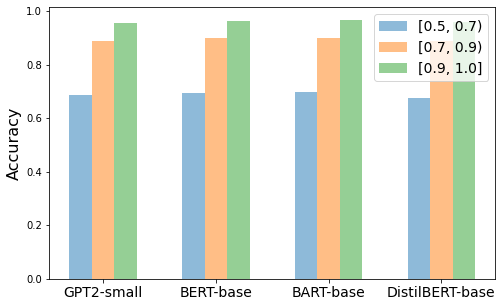

In [20]:
interval_means = {}

for i in np.arange(0.5, 1.01, 0.2):
    key = f"[{round(i, 2)}, {round(i+0.2, 2)}]"
    interval_means[key] = []
    
    for m in names:
        x = DATA[m]['snli_std2_test']
        interval_means[key].append(x[(i <= x['agreement']) & (x['agreement'] < i+0.2)]['correct_yx'].mean())

width = 0.20       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
x = np.arange(len(names.keys()))

ax.bar(x - width, interval_means["[0.5, 0.7]"], width, label="[0.5, 0.7)", alpha=0.5)
ax.bar(x, interval_means["[0.7, 0.9]"], width, label="[0.7, 0.9)", alpha=0.5)
ax.bar(x + width, interval_means["[0.9, 1.1]"], width, label="[0.9, 1.0]", alpha=0.5)

ax.set_ylabel('Accuracy', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels([ names[m] for m in names ], fontsize=14)
ax.legend(loc='best', fontsize=14)

plt.rcParams["figure.figsize"] = (8,5)
plt.show()

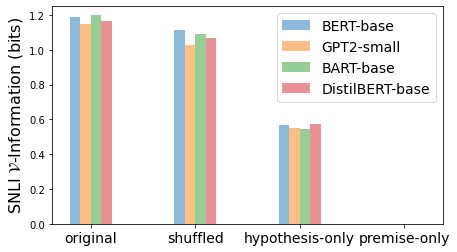

In [6]:
fig, ax = plt.subplots()
transformations = ['snli_std2_test', 'snli_shuffled_test', 'snli_hypothesis_test', 'snli_premise_test'] #, 'snli_raw_overlap_test']
x = np.arange(len(transformations))
width = 0.20

ax.bar(x - 3 * width / 4, [ DATA['bert-base-cased'][t]['PVI'].mean() for t in transformations ], width / 2, label='BERT-base', alpha=0.5)
ax.bar(x - width / 4, [ DATA['gpt2'][t]['PVI'].mean() for t in transformations ], width / 2, label='GPT2-small', alpha=0.5)
ax.bar(x + width / 4, [ DATA['facebook-bart-base'][t]['PVI'].mean() for t in transformations ], width/2, label='BART-base', alpha=0.5)
ax.bar(x + 3 * width / 4, [ DATA['distilbert-base-uncased'][t]['PVI'].mean() for t in transformations ], width/2, label='DistilBERT-base', alpha=0.5)
    
ax.set_ylabel('SNLI $\mathcal{V}$-Information (bits)', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(['original', 'shuffled', 'hypothesis-only', 'premise-only'], fontsize=14)
ax.legend(loc='best', fontsize=14)
ax.set_ylim([0, 1.25])
plt.rcParams["figure.figsize"] = (7,4)

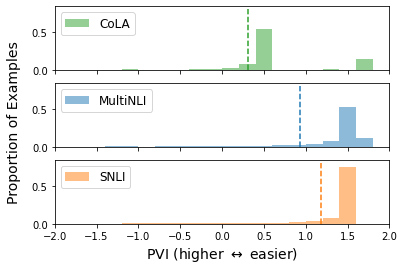

In [6]:
m = 'bert-base-cased'

multinli = DATA[m]['multinli_validation_std']['PVI']
snli = DATA[m]['snli_std2_test']['PVI']
cola = DATA[m]['cola_id_dev_std']['PVI']

bins = np.arange(-10, 2, 0.2)
# plt.hist(correct, weights=np.ones_like(correct)/len(correct), label='correct', alpha=0.5, bins=bins)
# plt.hist(incorrect, weights=np.ones_like(incorrect)/len(incorrect), label='incorrect', alpha=0.5, bins=bins)
# plt.legend(loc='best', fontsize=12)
# plt.show()

f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True) #, gridspec_kw={'height_ratios': [1, 3]})

# plot the same data on both axes
ax1.hist(cola, weights=np.ones_like(cola)/len(cola), label='CoLA', alpha=0.5, bins=bins, color='tab:green')
ax2.hist(multinli, weights=np.ones_like(multinli)/len(multinli), label='MultiNLI', alpha=0.5, bins=bins, color='tab:blue')
ax3.hist(snli, weights=np.ones_like(snli)/len(snli), label='SNLI', alpha=0.5, bins=bins, color='tab:orange')

ax1.vlines(cola.mean(), 0, 0.8, linestyles='dashed', color='tab:green')
ax2.vlines(multinli.mean(), 0, 0.8, linestyles='dashed', color='tab:blue')
ax3.vlines(snli.mean(), 0, 0.8, linestyles='dashed', color='tab:orange')

# f.subplots_adjust(hspace=0.5)
plt.rcParams['axes.facecolor'] = 'white'
ax1.legend(loc='upper left', fontsize=12)
ax2.legend(loc='upper left', fontsize=12)
ax3.legend(loc='upper left', fontsize=12)
plt.rcParams["figure.figsize"] = (6, 4)
plt.xlim([-2, 2])
plt.xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=14)
ax1.set_ylabel('Proportion of Examples', fontsize=14)
ax1.yaxis.set_label_coords(-0.1, -0.8)
f.patch.set_facecolor('white')
plt.show()

Ttest_indResult(statistic=25.83850887034967, pvalue=1.3371980397839981e-95) 2.4479507429173974
Ttest_indResult(statistic=141.96618150443476, pvalue=0.0) 3.0310871231847414
Ttest_indResult(statistic=138.69347461001377, pvalue=0.0) 2.869078473622052


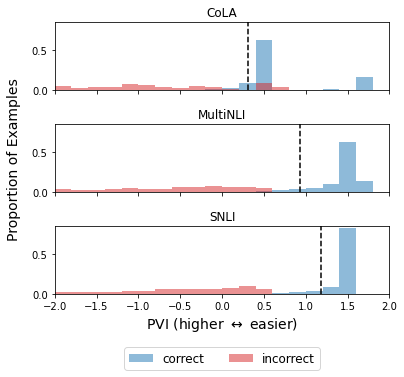

In [4]:
m = 'bert-base-cased'

multinli = DATA[m]['multinli_validation_std']
snli = DATA[m]['snli_std2_test']
cola = DATA[m]['cola_id_dev_std']

bins = np.arange(-10, 2, 0.2)


f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True) #, gridspec_kw={'height_ratios': [1, 3]})

for ax, dataset, name in [(ax1, cola, 'CoLA'), (ax2, multinli, 'MultiNLI'), (ax3, snli, 'SNLI')]:
    correct = dataset[dataset['correct_yx'] == True]['PVI']
    incorrect = dataset[dataset['correct_yx'] == False]['PVI']
    print(ttest_ind(correct, incorrect), np.mean(correct) - np.mean(incorrect))
    ax.hist(correct, weights=np.ones_like(correct)/len(correct), label=f'correct', alpha=0.5, bins=bins, color='tab:blue')
    ax.hist(incorrect, weights=np.ones_like(incorrect)/len(incorrect), label=f'incorrect', alpha=0.5, bins=bins, color='tab:red')
    ax.vlines(dataset['PVI'].mean(), 0, 0.85, linestyles='dashed', color='black')
    ax.set_title(name)
    ax.set_ylim([0,0.85])

plt.legend(loc="lower center", bbox_to_anchor=(0.5, -1.2), fontsize=12, ncol=2)
f.subplots_adjust(hspace=0.5)
plt.rcParams["figure.figsize"] = (6, 5)
plt.xlim([-2, 2])
plt.xlabel('PVI (higher $\leftrightarrow$ easier)', fontsize=14)
ax1.set_ylabel('Proportion of Examples', fontsize=14)
ax1.yaxis.set_label_coords(-0.1, -1.0)
plt.show()

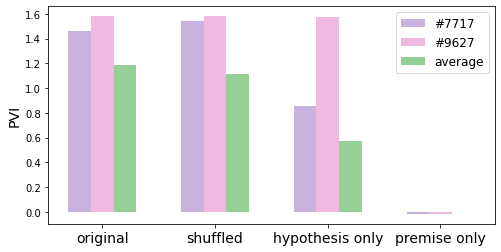

In [12]:
width = 0.20 

# DATA['bert-base-cased']['snli_std2_test'][(DATA['bert-base-cased']['snli_std2_test']['label'] == 2) & (DATA['bert-base-cased']['snli_std2_test']['correct_yx'] == False)].sample(n=1)

m = 'bert-base-cased'
fig, ax = plt.subplots()
attrs = ['snli_std2_test', 'snli_shuffled_test', 'snli_hypothesis_test', 'snli_premise_test'] #, 'snli_raw_overlap_test']
x = np.arange(len(attrs))

a,b = 7717, 9627
ax.bar(x - width, [ DATA[m][attr].loc[a]['PVI'] for attr in attrs ], width, color='tab:purple', label=f'#{a}', alpha=0.5)
ax.bar(x, [ DATA[m][attr].loc[b]['PVI'] for attr in attrs ], width, color='tab:pink', label=f'#{b}', alpha=0.5)
ax.bar(x + width, [ DATA[m][attr]['PVI'].mean() for attr in attrs ], width, color='tab:green', label='average', alpha=0.5)

ax.set_xticks(x)
ax.set_xticklabels(['original', 'shuffled', 'hypothesis only', 'premise only'], fontsize=14)
ax.set_ylabel('PVI', fontsize=14)

plt.legend(loc='best', fontsize=12)
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

# makes sense to compare I(t(X) -> Y), but not PVI(t(x) -> y) across t

In [117]:
# DATA['bert-base-cased']['snli_std2_test'][(DATA['bert-base-cased']['snli_std2_test']['label'] == 2) & (DATA['bert-base-cased']['snli_std2_test']['correct_yx'] == True)].sample(n=2)
DATA['bert-base-cased']['snli_std2_test'].iloc[[9627, 7717]].to_dict()

{'Unnamed: 0': {9627: 9627, 7717: 7717},
 'Unnamed: 0.1': {9627: 9627, 7717: 7717},
 'premise': {9627: 'A group of people watching a boy getting interviewed by a man.',
  7717: 'Little kids play a game of running around a pole.'},
 'hypothesis': {9627: 'A group of people are sleeping on Pluto.',
  7717: 'The kids are fighting outside.'},
 'label': {9627: 2, 7717: 2},
 'sentence1': {9627: 'PREMISE: A group of people watching a boy getting interviewed by a man. HYPOTHESIS: A group of people are sleeping on Pluto.',
  7717: 'PREMISE: Little kids play a game of running around a pole. HYPOTHESIS: The kids are fighting outside.'},
 'H_yb': {9627: 1.5804970099094535, 7717: 1.5804970099094535},
 'H_yx': {9627: 0.000633895309366346, 7717: 0.11917694000869206},
 'correct_yx': {9627: True, 7717: True},
 'PVI': {9627: 1.5798631146000872, 7717: 1.4613200699007616},
 'agreement': {9627: 1.0, 7717: 0.8}}

In [2]:
df = pd.DataFrame()

for i in [0,1,2]:
    x = pd.read_csv('artefacts/snli_artefacts.csv').sort_values(str(i), ascending=False)[:10]
    df[i] = x.apply(lambda row: f"{row['Unnamed: 0']} ({round(row[str(i)], 3)})", axis=1).reset_index(drop=True)

print(df.to_latex(index=False))

\begin{tabular}{lll}
\toprule
                   0 &                   1 &                   2 \\
\midrule
         nap (3.256) &        tall (4.246) &      Nobody (7.258) \\
        bald (3.183) &       naked (2.193) &         not (4.898) \\
      crying (2.733) &     indoors (1.724) &          no (4.458) \\
       Woman (2.517) &       light (1.442) &       naked (3.583) \\
      asleep (2.482) &         fun (1.318) &      crying (2.938) \\
    sleeping (2.416) &         bed (1.006) &     indoors (2.523) \\
        soda (2.267) &  motorcycle (0.993) &  vegetables (2.295) \\
         bed (2.136) &       works (0.969) &    sleeping (2.293) \\
         not (2.111) &        race (0.943) &      jogging (2.17) \\
 snowboarder (2.099) &    daughter (0.924) &         cat (2.092) \\
\bottomrule
\end{tabular}



In [8]:
pd.read_csv('artefacts/dwmw_artefacts.csv').sort_values('1', ascending=False)[:10]

,Unnamed: 0,0,1,2
627,nigs,1.070015,2.038950,NaN
3026,pussies,-1.377300,1.846088,NaN
660,nig,1.813300,1.804136,-1.199522
9701,cunts,0.639232,1.782677,NaN
2637,negro,2.281473,1.779261,-1.210328
2276,retards,1.908598,1.753388,-4.330331
1915,retarded,1.533761,1.579939,-2.505184
674,retard,1.846425,1.574970,-5.523307
5890,nigguh,1.356600,1.516538,NaN
466,niggah,0.862958,1.491089,NaN


Text(0, 0.5, '$\\mathcal{V}$-Information Estimate')

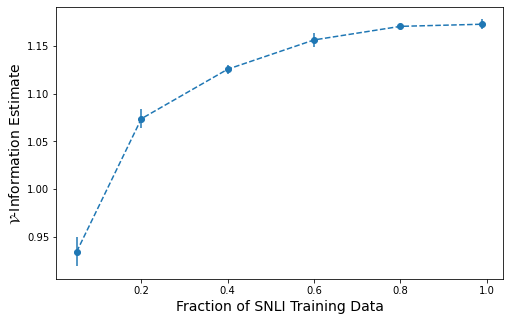

In [26]:
m = 'bert-base-cased'
fracs = [ '0.05', '0.2', '0.4', '0.6', '0.8', '0.99' ]
x = [ 0.05, 0.2, 0.4, 0.6, 0.8, 0.99 ]
means = [ np.mean([DATA[m][f'snli_std_test_{letter}_{frac}'.strip('_')]['PVI'].mean().round(3) for letter in 'bcde']) for frac in fracs ]
std = [ np.std([DATA[m][f'snli_std_test_{letter}_{frac}'.strip('_')]['PVI'].mean().round(3) for letter in 'bcde']) for frac in fracs ]

plt.errorbar(x, means, yerr=std, fmt='o--')
# plt.plot(x, [ DATA[m][f'cola_id_dev_std_{frac}'.strip('_')]['PVI'].mean().round(3) for frac in fracs ], 'o--', label='CoLA')
plt.xlabel('Fraction of SNLI Training Data', fontsize=14)
plt.ylabel('$\mathcal{V}$-Information Estimate', fontsize=14)

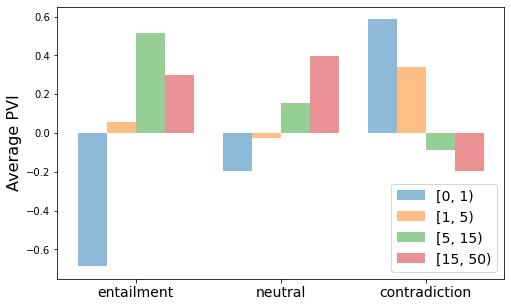

In [4]:
from transformers import pipeline, AutoTokenizer
interval_means = {}
cutoffs = [ 0, 1, 5, 15, 50 ]
m = 'bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(m)

for index in range(len(cutoffs) - 1):
    i,j = cutoffs[index], cutoffs[index+1]
    key = f"[{i}, {j}]"
    interval_means[key] = []
    
    y = DATA[m]['snli_raw_overlap_test'].apply(lambda row: i <= len(tokenizer.tokenize(row['sentence1'])) < j, axis=1)
    subset = DATA[m]['snli_raw_overlap_test'][y]
    
    for label in [0,1,2]:
        interval_means[key].append(subset[subset['label'] == label]['PVI'].mean())

width = 0.20       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
x = np.arange(3)

ax.bar(x - 1.5 * width, interval_means["[0, 1]"], width, label="[0, 1)", alpha=0.5)
ax.bar(x - 0.5 * width, interval_means["[1, 5]"], width, label="[1, 5)", alpha=0.5)
ax.bar(x + 0.5 * width, interval_means["[5, 15]"], width, label="[5, 15)", alpha=0.5)
ax.bar(x + 1.5 * width, interval_means["[15, 50]"], width, label="[15, 50)", alpha=0.5)

ax.set_ylabel('Average PVI', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(['entailment', 'neutral', 'contradiction'], fontsize=14)
ax.legend(loc='best', fontsize=14)

plt.rcParams["figure.figsize"] = (8,5)
plt.show()